In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from scipy import stats
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import tree
from sklearn import ensemble
from sklearn import metrics
from sklearn import feature_selection

from itertools import combinations
from scipy.stats import ttest_ind

from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics # инструменты для оценки точности модели

In [12]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv("./drive/MyDrive//dataREST.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
df.head(1)

,status,private pool,propertyType,street,baths,homeFacts,fireplace,city,schools,sqft,zipcode,beds,state,stories,mls-id,PrivatePool,MlsId,target
0,Active,NaN,Single Family Home,240 Heather Ln,3.5,"{'atAGlanceFacts': [{'factValue': '2019', 'fac...",Gas Logs,Southern Pines,"[{'rating': ['4', '4', '7', 'NR', '4', '7', 'N...",2900,28387,4,NC,NaN,NaN,NaN,611019,"$418,000"


In [14]:
info = pd.DataFrame(df.isnull().sum(),columns=["IsNull"])
info.insert(1,"IsNa",df.isna().sum(),True)
info.insert(2,"Duplicate",df.duplicated().sum(),True)
info.insert(3,"Unique",df.nunique(),True)
info.insert(4,"count",df.count(),True)
info.insert(4,"type",df.dtypes,True)
info.T

,status,private pool,propertyType,street,baths,homeFacts,fireplace,city,schools,sqft,zipcode,beds,state,stories,mls-id,PrivatePool,MlsId,target
IsNull,39918,373004,34733,2,106338,0,274070,34,0,40577,0,91282,0,150715,352243,336874,66880,2481
IsNa,39918,373004,34733,2,106338,0,274070,34,0,40577,0,91282,0,150715,352243,336874,66880,2481
Duplicate,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50
Unique,159,1,1280,337076,229,321009,1653,2026,297365,25405,4549,1184,39,348,24907,2,232944,43939
type,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object
count,337267,4181,342452,377183,270847,377185,103115,377151,377185,336608,377185,285903,377185,226470,24942,40311,310305,374704


**обработка признаков**

In [15]:
df.drop('private pool', axis= 1 , inplace= True )
df.drop('fireplace', axis= 1 , inplace= True )
df.drop('mls-id', axis= 1 , inplace= True )
df.drop('PrivatePool', axis= 1 , inplace= True )
df.drop('street', axis= 1 , inplace= True )
df.drop('MlsId', axis= 1 , inplace= True )

target

In [16]:
df["target"] = df["target"].str.replace(r"[^\d\.]", "", regex=True)
df['target']=df['target'].str.replace('.', '', regex=True)
df['target']=df['target'].replace('', np.nan).bfill()
df['target']  = pd.to_numeric(df['target'] , errors='coerce')
df['target'].astype(int)

0          418000
1          310000
2         2895000
3         2395000
4            5000
           ...   
377180    1249000
377181     674999
377182     528000
377183      34500
377184     204900
Name: target, Length: 377185, dtype: int64

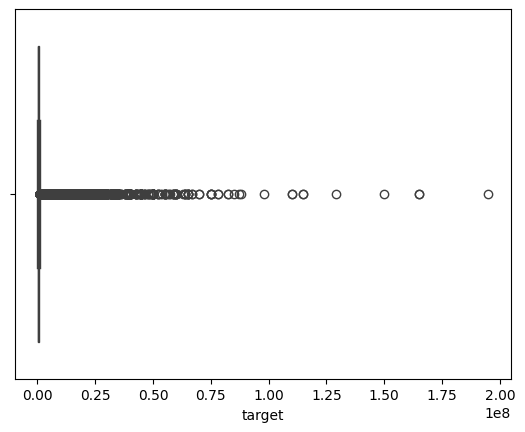

In [17]:
import seaborn as sns
sns.boxplot(x='target', data=df);

In [18]:
df=df[df.target < 800000]

In [19]:
# удалим дублекаты
df=df.drop_duplicates ()

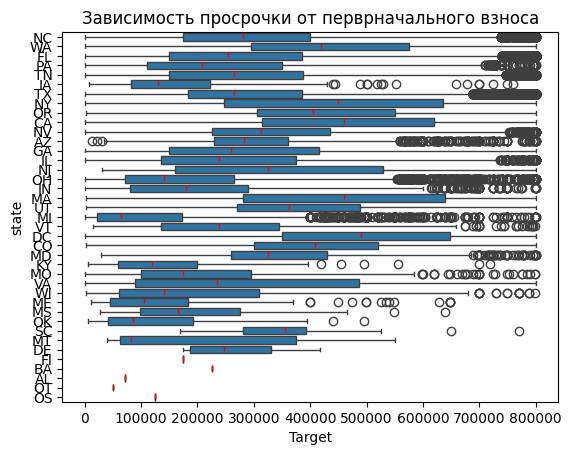

In [20]:
ax = sns.boxplot(df, x='target', y='state', orient='h', medianprops={"color": "red", "linestyle": '--'})
ax.set(xlabel='Target', ylabel='state')
plt.title('Зависимость просрочки от перврначального взноса' )
plt.show()

	**Status**

In [21]:
df['Status']= df['status'].astype(str)
df['Status']=df['Status'].apply(lambda x: x.replace(".", ''))
df['Status']= df['Status'].str.lower()
df['Status']= df['Status'].str.replace('24', '')
df['Status']= df['Status'].str.replace('23', '')
df['Status']= df['Status'].str.replace('26', '')
df['Status']= df['Status'].str.replace('29', '')
df['Status']= df['Status'].str.replace('17', '')
df['Status']= df['Status'].str.replace('21', '')
df['Status']= df['Status'].str.replace('15', '')
df['Status']= df['Status'].str.replace('8', '')
df['Status']= df['Status'].str.replace('11', '')
df['Status']= df['Status'].str.replace('14', '')
df['Status']= df['Status'].str.replace(' Dec ', '')
df['Status']= df['Status'].str.replace(' Nov ', '')
df['Status']= df['Status'].str.replace(' Oct ', '')
df['Status']= df['Status'].str.replace('nan', '')
df['Status'] = df['Status'].str.replace('coming soon:', 'for sale')
df['Status']= df['Status'].str.replace('temporary for sale', 'for sale')
#df['Status']= df['Status'].str.replace('Pending W/Backup Wanted', 'pending')
#df['Status']= df['Status'].str.replace('Pending Backups Wanted', 'pending')
#df['Status']= df['Status'].str.replace('Pending W/Escape Clause', 'pending')
#df['Status']= df['Status'].str.replace('Pending Take Backups', 'pending')
df['Status']=df['Status'].str.replace('for sale under contract', 'under contract')
df['Status']=df['Status'].str.replace('under contract show', 'under contract')
df['Status']=df['Status'].str.replace('under contract   showing', 'under contract')
df['Status']= df['Status'].str.replace('a for sale', 'for sale')
#df['Status']= df['Status'].str.replace('pre-foreclosure / auction', 'pre-foreclosure')
df['Status']= df['Status'].str.replace('pending continue to show', 'pending')
df['Status']= df['Status'].str.replace('option pending', 'pending')
df['Status']= df['Status'].str.replace(' / auction', 'auction')
df['Status']= df['Status'].str.replace('active under contract', 'under contract')
df['Status']= df['Status'].str.replace('p pending sale', 'pending')
df['Status']= df['Status'].str.replace('contingent fice and inspection', 'contingent')
df['Status']= df['Status'].str.replace('contingent show', 'contingent')
df['Status']= df['Status'].str.replace('a active', 'active')
df['Status']= df['Status'].str.replace('for sale nov', 'for sale')
df['Status']= df['Status'].str.replace('new', 'for sale')
df['Status']= df['Status'].str.replace('under contract backups', 'under contract')
df['Status']= df['Status'].str.replace('pre-foreclosureauction', 'pre-foreclosure')
df['Status'].fillna(df['Status'].mode()[0], inplace=True)
df['Status']= df['Status'].replace('', np.nan).bfill()

In [22]:
df['Status']= df['Status'].str.replace('back on market', 'for sale')

In [23]:
t=df['Status'].value_counts()
t.head(40)

for sale                             185850
active                                97732
foreclosure                            7135
pending                                5372
for sale construction                  4808
pre-foreclosure                        3930
under contract                         3463
auction                                1474
p                                      1263
contingent                             1030
price change                            508
foreclosed                              485
for rent                                439
recently sold                           265
pending taking backups                   64
option contract                          61
pending with contingencies               54
active with offer                        50
active backup                            41
pi                                       38
contract p                               36
c                                        35
auction - active                

In [24]:
df=df.drop_duplicates ()

In [25]:
df.drop('status', axis= 1 , inplace= True )

In [26]:
type_list = []
for type in df['Status']:
    if type not in ['for sale' ,'active' ,'foreclosure' ,'for sale construction','active construction','pendingending'  ,'pendingre-foreclosure'  ,'under contract'  ,'auction' ,'contingent' ,
'price change' ,'foreclosed' ,'recently sold','option pending ','pending taking backups','option contract', 'active backup','pending with contingencies','active with offer']:
      type = 'other'
    type_list.append(type)
df['Status'] = type_list
df['Status'].fillna(df['Status'].mode()[0], inplace=True)

In [27]:
df['Status'].value_counts()

for sale                      185850
active                         97732
other                          11702
foreclosure                     7135
for sale construction           4808
under contract                  3463
auction                         1474
contingent                      1030
price change                     508
foreclosed                       485
recently sold                    265
pending taking backups            64
option contract                   61
pending with contingencies        54
active with offer                 50
active backup                     41
Name: Status, dtype: int64

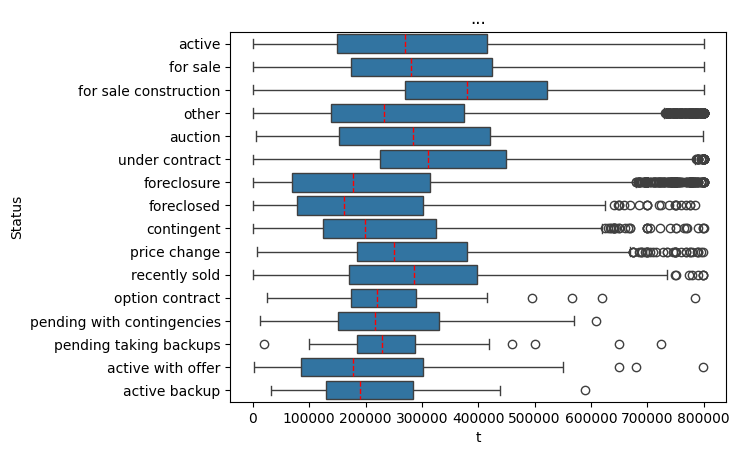

In [28]:
ax = sns.boxplot(df, x='target', y='Status', orient='h', medianprops={"color": "red", "linestyle": '--'})
ax.set(xlabel='t', ylabel='Status')
plt.title('...' )
plt.show()

propertyType

In [29]:
df['propertyType'] = df['propertyType'].str.lower()
df['propertyType'] = df['propertyType'].str.replace('-', ' ')
df['propertyType'] = df['propertyType'].str.replace('single family home', 'single family')
df['propertyType'] = df['propertyType'].str.replace('mfd/Mmobile home', 'mobile Home')
df['propertyType'] = df['propertyType'].str.replace('mobile/manufactured', 'mobile Home')
df['propertyType'] = df['propertyType'].str.replace('mobile / manufactured', 'mobile Home')
df['propertyType'] = df['propertyType'].str.replace('condo/townhome/row home/co-op', 'condo')
df['propertyType'] = df['propertyType'].str.replace('condo', 'condo')
df['propertyType'] = df['propertyType'].str.replace('townhouse', 'townhouse')
df['propertyType'] = df['propertyType'].str.replace('multi family home', 'multi family')
df['propertyType'] = df['propertyType'].str.replace('contemporary/modern', 'contemporary')
df['propertyType'] = df['propertyType'].str.replace('lot/land', 'land')
df['propertyType'] = df['propertyType'].str.replace('one story', '1 story')
df['propertyType'] = df['propertyType'].str.replace('two story', '2 story')
df['propertyType'] = df['propertyType'].str.replace('detached, ', '')
df['propertyType'] = df['propertyType'].str.replace('2 stories', '2 story')
df['propertyType'] = df['propertyType'].str.replace('ranch', 'farms/ranches')
df['propertyType'] = df['propertyType'].str.replace(', traditional', '')
df['propertyType'] = df['propertyType'].str.replace('coop', 'cooperative')
df['propertyType'] = df['propertyType'].str.replace('farms/farms/farms/farms/rancheseseses	', 'farms/ranches')
df['propertyType'] = df['propertyType'].str.replace('farms/farms/farms/rancheseses', 'farms/ranches')
df['propertyType'] = df['propertyType'].str.replace('farms/farms/rancheses', 'farms/ranches')
df['propertyType'] = df['propertyType'].str.replace('apartment', 'apartment')
df['propertyType'] = df['propertyType'].str.replace('singlefamilyresidence', 'single family')
df['propertyType'] = df['propertyType'].str.replace('single detached', 'single family')
df['propertyType'] = df['propertyType'].str.replace('single traditional', 'single family')
df['propertyType'] = df['propertyType'].str.replace('single contemporary', 'single family')
df['propertyType'] = df['propertyType'].str.replace('condo/townhome, contemporary	', 'condo')
df['propertyType'] = df['propertyType'].str.replace('condo/townhome', 'condo')
df['propertyType'] = df['propertyType'].str.replace(', contemporary', '')
df['propertyType'] = df['propertyType'].str.replace('condo/townhome', 'condo')
df['propertyType'] = df['propertyType'].str.replace(', traditional', '')
df['propertyType'] = df['propertyType'].str.replace(', modern', '')
df['propertyType'] = df['propertyType'].str.replace('/unit', '')
df['propertyType'] = df['propertyType'].str.replace('land', 'farms/ranches')
df['propertyType'] = df['propertyType'].str.replace('1 story, spanish/mediterranean', '1 story')
df['propertyType'] = df['propertyType'].str.replace('1 story with basement', '1 Story')
df['propertyType'] = df['propertyType'].replace('', np.nan).bfill()

In [30]:
a=df['propertyType'].value_counts()
a.head(35)

single family                 177135
condo                          37189
farms/ranches                  33375
townhouse                      17794
multi family                    8272
condo/row home/co op            7262
traditional                     5694
1 story                         3663
mobile Home                     2908
cooperative                     2777
contemporary                    2518
2 story                         2171
high rise                       1447
colonial                        1089
mfd/mobile home                  883
apartment                        748
florida                          569
transitional                     499
cooperativeerative               490
bungalow                         483
garden home                      325
cape cod                         308
other style                      262
spanish/mediterranean            220
condominium (single level)       212
split level                      204
craftsman                        188
m

In [31]:
type_list = []
for type in df['propertyType']:
    if type not in ['single family', 'condo','townhouse','multi family','condo/row home/co op' ,'traditional' ,'1 story' ,'cooperative' ,'contemporary' ,'mobile Home ','farms/ranches'  ,
'high rise','2 story','colonial','apartment','transitional','florida']:
      type = 'other'
    type_list.append(type)
df['propertyType'] = type_list
df['propertyType'].fillna(df['propertyType'].mode()[0], inplace=True)

In [32]:
df=df.drop_duplicates ()

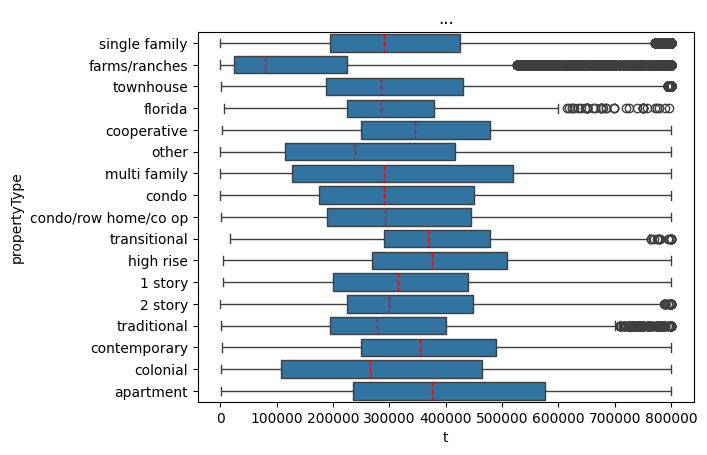

In [33]:
ax = sns.boxplot(df, x='target', y='propertyType', orient='h', medianprops={"color": "red", "linestyle": '--'})
ax.set(xlabel='t', ylabel='propertyType')
plt.title('...' )
plt.show()

In [34]:
info = pd.DataFrame(df.isnull().sum(),columns=["IsNull"])
info.insert(1,"IsNa",df.isna().sum(),True)
info.insert(2,"Duplicate",df.duplicated().sum(),True)
info.insert(3,"Unique",df.nunique(),True)
info.insert(4,"count",df.count(),True)
info.insert(4,"type",df.dtypes,True)
info.T

,propertyType,baths,homeFacts,city,schools,sqft,zipcode,beds,state,stories,target,Status
IsNull,0,90057,0,24,0,32181,0,76355,0,121982,0,0
IsNa,0,90057,0,24,0,32181,0,76355,0,121982,0,0
Duplicate,0,0,0,0,0,0,0,0,0,0,0,0
Unique,17,154,267973,1898,253397,18221,4419,1006,39,299,28439,16
type,object,object,object,object,object,object,object,object,object,object,int64,object
count,314713,224656,314713,314689,314713,282532,314713,238358,314713,192731,314713,314713


In [35]:
df['homeFacts'] = df['homeFacts'].astype(str)
df['homeFacts1'] = df['homeFacts'].apply(lambda x: x.replace('atAGlanceFacts', ''))
df['homeFacts1'] = df['homeFacts1'].apply(lambda x: x.replace('factValue', ''))
df['homeFacts1'] = df['homeFacts1'].apply(lambda x: x.replace('factLabel', ''))
df['homeFacts1'] = df['homeFacts1'].apply(lambda x: x.replace('Year built', ''))
df['homeFacts1'] = df['homeFacts1'].apply(lambda x: x.replace('Remodeled year', ''))
df['homeFacts1'] = df['homeFacts1'].apply(lambda x: x.replace('Cooling', ''))
df['homeFacts1'] = df['homeFacts1'].apply(lambda x: x.replace('Heating', ''))
df['homeFacts1'] = df['homeFacts1'].apply(lambda x: x.replace('lotsize', ''))
df['homeFacts1'] = df['homeFacts1'].apply(lambda x: x.replace('Price/sqft', ''))
df['homeFacts1'] = df['homeFacts1'].apply(lambda x: x.replace(':', ''))
df['homeFacts1'] = df['homeFacts1'].apply(lambda x: x.replace(',', ''))
df['homeFacts1'] = df['homeFacts1'].apply(lambda x: x.replace('{', ''))
df['homeFacts1'] = df['homeFacts1'].apply(lambda x: x.replace('}', ''))
df['homeFacts1'] = df['homeFacts1'].apply(lambda x: x.replace(' sqft', ''))
df['homeFacts1'] = df['homeFacts1'].apply(lambda x: x.replace('/sqft', ''))
df['homeFacts1'] = df['homeFacts1'].apply(lambda x: x[:-9])
df['homeFacts1'] = df['homeFacts1'].apply(lambda x: x[8:])
df['Year built']= df['homeFacts1'].str.rstrip().str.split( ).str[0]
df['Remodeled_year']= df['homeFacts1'].str.rstrip().str.split( ).str[4]
df['Heating']= df['homeFacts1'].str.rstrip().str.split( ).str[8]
#df['Cooling']= (df['homeFacts1'].str.rstrip().str.split( ).str[-13]+df['homeFacts1'].str.rstrip().str.split( ).str[-14])
df['lotsize']= (df['homeFacts1'].str.rstrip().str.split( ).str[-5]+df['homeFacts1'].str.rstrip().str.split( ).str[-4])
df['Price/sqft']= df['homeFacts1'].str.rstrip().str.split( ).str[-1]

In [36]:
df.drop('homeFacts', axis= 1 , inplace= True )

In [37]:
df.drop('homeFacts1', axis= 1 , inplace= True )

In [38]:
df=df.drop_duplicates ()

In [39]:
# Year built
df['Year built'] = df['Year built'].str.replace(r"[^\d\.]", "", regex=True)
df['Year built']=pd.to_numeric(df['Year built'], errors='coerce')
df['Year built'] = df['Year built'].replace('', np.nan).bfill()
#df['Year built'] = df['Year built'].fillna(df['Year built'].median())
df['Year built'].astype(int)

0         2019
1         2019
4         1920
5         1920
6         2006
          ... 
377179    2010
377181    1924
377182    1950
377183    2019
377184    2019
Name: Year built, Length: 314380, dtype: int64

In [40]:
# Remodeled_year
df['Remodeled_year']=df['Remodeled_year'].str.replace(r"[^\d\.]", "", regex=True)
df['Remodeled_year']=df['Remodeled_year'].replace('', np.nan).bfill()
df['Remodeled_year'] = pd.to_numeric(df['Remodeled_year'], errors='coerce')
#df['Remodeled_year'].df['Remodeled_year'].fillna(df['Remodeled_year'].mode())
#df['Remodeled_year'].astype(int).round(0)

In [41]:
df['Remodeled_year'].fillna(df['Remodeled_year'].mode()[0], inplace=True)

In [42]:
# Price/sqft
df['Price/sqft']=df['Price/sqft'].str.replace(r"[^\d\.]", "", regex=True)
df['Price/sqft']=df['Price/sqft'].replace('', np.nan).bfill()
df['Price/sqft'] = pd.to_numeric(df['Price/sqft'], errors='coerce')
df['Price/sqft']=df['Price/sqft'].fillna(df['Price/sqft'].mode())
df['Price/sqft'].astype(int)

0         14
1         15
4         23
5         23
6          6
          ..
377179    56
377181    33
377182    45
377183    14
377184    14
Name: Price/sqft, Length: 314380, dtype: int64

In [43]:
# Heating
df['Heating']=df['Heating'].apply(lambda x: x.replace("'", ''))
df['Heating']=df['Heating'].str.lower()
df['Heating']=df['Heating'].apply(lambda x: x.replace('propane', 'gas'))
df['Heating']=df['Heating'].apply(lambda x: x.replace('has', 'gas'))
df['Heating']=df['Heating'].apply(lambda x: x.replace('wall/window', 'wall'))
df['Heating']=df['Heating'].apply(lambda x: x.replace('window', 'no'))
df['Heating']=df['Heating'].apply(lambda x: x.replace('none', 'no'))
df['Heating']=df['Heating'].apply(lambda x: x.replace('baseboard/wall', 'baseboard'))
df['Heating']=df['Heating'].replace('', np.nan).bfill()
#df['Heating']=df['Heating'].fillna(df['Heating'].mode())

In [44]:
df['Heating']=df['Heating'].fillna(df['Heating'].mode())

In [45]:
t=df['lotsize'].value_counts()
t.head(15)

acres'''     43539
''''         28399
None''       23120
lot'''       17819
Data'''       4549
'—'''         4166
Ft.'''        3318
Acres'''      2656
'6098'''      2079
'10000'''     1991
'7405'''      1990
'6534'''      1741
'10019'''     1622
'5227'''      1605
'4356'''      1604
Name: lotsize, dtype: int64

In [46]:
df['lotsize']=df['lotsize'].str.replace(r"[^\d\.]", "", regex=True)
df['lotsize']=df['lotsize'].apply(lambda x: x.replace(".", ''))
df['lotsize']=df['lotsize'].replace('', np.nan).bfill()
df['lotsize']=df['lotsize']. fillna(df['lotsize'].mode())
df['lotsize'] = pd.to_numeric(df['lotsize'], errors='coerce')
df['lotsize'].astype(int)

0          5828
1          5828
4         10019
5           680
6           120
          ...  
377179     1600
377181     1600
377182     1600
377183     6969
377184     6969
Name: lotsize, Length: 314380, dtype: int64

In [47]:
type_list = []
for type in df['Heating']:
    if type not in ['forced', 'central', 'electric', 'gas ', 'heat', 'no', 'baseboard ','wall' , 'refrigeration', 'natural ', 'radiant']:
        type = 'other'
    type_list.append(type)
df['Heating'] = type_list
df['Heating'].fillna(df['Heating'].mode()[0], inplace=True)

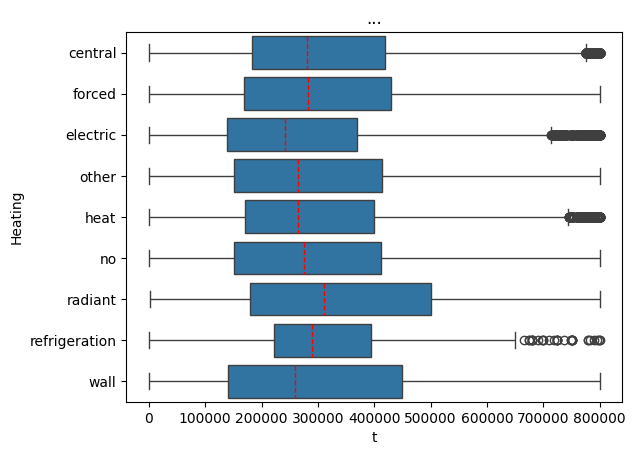

In [48]:
ax = sns.boxplot(df, x='target', y='Heating', orient='h', medianprops={"color": "red", "linestyle": '--'})
ax.set(xlabel='t', ylabel='Heating')
plt.title('...' )
plt.show()

In [49]:
df=df.drop_duplicates ()

In [50]:

import re
df['schools'] = df['schools'].astype(str)
df['schools_rating'] = df['schools'].apply(lambda x: re.sub(r'data.*', '', x)) #удалит data
df['schools_rating'] = df['schools_rating'].apply(lambda x: re.sub(r'/10', '', x))
df['schools_rating'] = df['schools_rating'].apply(lambda x: x.replace('rating', ''))
df['schools_rating'] = df['schools_rating'].apply(lambda x: x[:-2])
df['schools_rating'] = df['schools_rating'].apply(lambda x: x[1:])

In [51]:
df['school_count'] = df['schools_rating'].apply(lambda x: (len(x.split(','))) if x != '' else 0)
df['school_count'] = df['school_count'].astype('int')
# Remove all letters
df['schools_rating'] = df['schools_rating'].apply(lambda x: re.sub(r'[a-zA-Z]', '', x))
# Remove comas withought numbers before them
df['schools_rating'] = df['schools_rating'].apply(lambda x: re.sub(r'\s+,', '', x))
# Remove comas at the end
df['schools_rating'] = df['schools_rating'].apply(lambda x: x[:-1])
# Create a new column 'schools_rating_list'
df['schools_rating_list'] = df['schools_rating'].apply(lambda x: [int(i) for i in re.findall(r'\d+', x)])
# Create a new column 'schools_rating_ave'
df['schools_rating_ave'] = df['schools_rating_list'].apply(lambda x: round(sum(x) / len(x), 2) if len(x) > 0 else 0)
# Unfortunately, '0' in 'schools_rating_ave' represents missing values.
# However, it may be interpreted as really bad schools around.
# Replace '0' with the average

df['schools_rating_ave'] = df['schools_rating_ave'].apply(np.round, decimals=2)

# Calculate the average of the 'schools_rating_ave' column
average = df['schools_rating_ave'].mean()

# Replace zero values with the average
df['schools_rating_ave'] = df['schools_rating_ave'].apply(
    lambda x: average if x < 1 else x
)

# Calculate the average distance to the schools around
# Leave only information about the distance

def extract_text(text):
  # Use a regex pattern to extract the text between 'Distance' and 'Grades'
  pattern = r"Distance': \['(.+?)'\], 'Grades'"
  match = re.search(pattern, text)
  if match:
    # Return the text that was found
    return match.group(1)
  else:
    # Return None if no text was found
    return None

# Apply the extract_text function to each cell in the 'schools' column
df['schools_distance'] = df['schools'].apply(extract_text)
df['schools_distance'] = df['schools_distance'].astype(str)
# Remove ' mi'
df['schools_distance'] = df['schools_distance'].apply(lambda x: re.sub(r'\smi', '', x))
# Remove other unnecessary symbols
df['schools_distance'] = df['schools_distance'].str.replace(r'[^\d.,\s]', '', regex=True)

# Convert cleaned strings into lists of float numbers
df['schools_distance'] = df['schools_distance'].apply(lambda x: [float(num) for num in x.split(',')] if x else [])

# Create a new column called 'schools_distance_ave'
df['schools_distance_ave'] = df['schools_distance'].apply(lambda x: round(sum(x)/len(x), 2) if x else 0)

In [52]:
df['schools_distance_ave'].astype(int)
df['schools_distance_ave'].astype(int)

0         5
1         1
4         4
5         0
6         3
         ..
377179    0
377181    4
377182    0
377183    1
377184    1
Name: schools_distance_ave, Length: 314380, dtype: int64

In [53]:
df.drop('schools_rating', axis= 1 , inplace= True )
df.drop('schools_rating_list', axis= 1 , inplace= True )
df.drop('schools_distance', axis= 1 , inplace= True )
df.drop('schools', axis= 1 , inplace= True )

In [54]:
# Sqft
df["Sqft"] = df["sqft"].str.replace(r"[^\d\.\,]", "", regex=True)
df['Sqft'] = df['Sqft'].str.replace(',', '',)
df['Sqft'] = df['Sqft'].str.replace('.', '',)
df['Sqft'] = df['Sqft'].replace('', np.nan).bfill()
#df['Sqft'] = df['Sqft']. fillna(df['Sqft'].mode())
df['Sqft'].fillna(df['Status'].mode()[0], inplace=True)
df['Sqft'] = df['Sqft'].astype (int)

<ipython-input-54-b22128d032d5>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Sqft'] = df['Sqft'].str.replace('.', '',)


In [55]:
df.drop('sqft', axis= 1 , inplace= True )

In [56]:
#  в столбце `baths` удаляем все символы, кроме цифр
df["baths_n"] = df["baths"].str.replace(r"[^\d\.]", "", regex=True)
df['baths_n']=df['baths_n'].str.replace('.1', '')
df['baths_n']=df['baths_n'].str.replace('.0', '')
df['baths_n']=df['baths_n'].str.replace('.2', '')
df['baths_n']=df['baths_n'].str.replace('.3', '')
df['baths_n']=df['baths_n'].str.replace('.4', '')
df['baths_n']=df['baths_n'].str.replace('.5', '')
df['baths_n']=df['baths_n'].str.replace('.6', '')
df['baths_n']=df['baths_n'].str.replace('.7', '')
df['baths_n']=df['baths_n'].str.replace('.8', '')
df['baths_n']=df['baths_n'].str.replace('.9', '')
df["baths_n"]=df['baths_n'].str.replace(" ", '')
df['baths_n']=df['baths_n'].str.replace('.', '')
df['baths_n']=df['baths_n'].replace('', np.nan).bfill()
#df['baths_n'] = df['baths_n']. fillna(df['baths_n'].median())
df["baths_n"]  = pd.to_numeric(df["baths_n"] , errors='coerce')
df['baths_n'].fillna(df['Status'].mode()[0], inplace=True)
df["baths_n"].astype(int)

<ipython-input-56-816f935bf9a7>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['baths_n']=df['baths_n'].str.replace('.1', '')
<ipython-input-56-816f935bf9a7>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df['baths_n']=df['baths_n'].str.replace('.0', '')
<ipython-input-56-816f935bf9a7>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df['baths_n']=df['baths_n'].str.replace('.2', '')
<ipython-input-56-816f935bf9a7>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df['baths_n']=df['baths_n'].str.replace('.3', '')
<ipython-input-56-816f935bf9a7>:7: FutureWarning: The default value of regex will change from True to False in a future version.
  df['baths_n']=df['baths_n'].str.replace('.4', '')
<ipython-input-56-816f935bf9a7>:8: FutureWarning: The default value of regex will change from T

0         3
1         3
4         2
5         2
6         2
         ..
377179    3
377181    3
377182    3
377183    2
377184    2
Name: baths_n, Length: 314380, dtype: int64

In [57]:
df.drop('baths', axis= 1 , inplace= True )

In [58]:
df=df.drop_duplicates ()

In [59]:
# beds_n
df["beds_n"] = df["beds"].str.replace(r"[^\d\.\,]", "", regex=True)
df['beds_n'] = df['beds_n'].str.replace(' ', '')
df['beds_n'] = df['beds_n'].str.replace(',', '.')
df['beds_n'] = df['beds_n'].str.replace('.4', '')
df['beds_n'] = df['beds_n'].str.replace('.3', '')
df['beds_n'] = df['beds_n'].str.replace(',', '.')
df['beds_n'] = df['beds_n'].str.replace('.7', '')
df['beds_n'] = df['beds_n'].str.replace('.', '')
df['beds_n'] = df['beds_n'].str.replace('.1', '')
df['beds_n'] = df['beds_n'].str.replace('.2', '')
df['beds_n'] = df['beds_n'].str.replace('.5', '')
df['beds_n'] = df['beds_n'].str.replace('.8', '')
df['beds_n'] = df['beds_n'].str.replace('.9', '')
df['beds_n'] = df['beds_n'].str.replace(".6", '')
df['beds_n'] = df['beds_n'].replace('', np.nan).bfill()
#df['beds_n'] = df['beds_n']. fillna(df['beds_n'].median())
df['beds_n'].fillna(df['Status'].mode()[0], inplace=True)
df['beds_n']  = pd.to_numeric(df['beds_n'] , errors='coerce')
df['beds_n'] = df['beds_n'].astype (int)

<ipython-input-59-b30e13e33f97>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df['beds_n'] = df['beds_n'].str.replace('.4', '')
<ipython-input-59-b30e13e33f97>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df['beds_n'] = df['beds_n'].str.replace('.3', '')
<ipython-input-59-b30e13e33f97>:8: FutureWarning: The default value of regex will change from True to False in a future version.
  df['beds_n'] = df['beds_n'].str.replace('.7', '')
<ipython-input-59-b30e13e33f97>:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['beds_n'] = df['beds_n'].str.replace('.', '')
<ipython-input-59-b30e13e33f97>:10: FutureWarning: The default value of regex will change from True to False in a future version.
  df['beds_n'] = df['beds_n'].str.repla

In [60]:
df.drop('beds', axis= 1 , inplace= True )

In [61]:
df['stories'] = df['stories'].str.replace(r"[^\d\.]", "", regex=True)
df['stories'] = df['stories'].str.replace('.0', '')
df['stories'] = df['stories'].str.replace('.5', '')
df['stories'] = df['stories'].str.replace('.', '')
df['stories'] = df['stories'].replace('', np.nan).bfill()
df['stories'].fillna(df['stories'].mode()[0], inplace=True)
df['stories'] = pd.to_numeric(df['stories'], errors='coerce')
df['stories'].astype(int)

<ipython-input-61-8c42a7559ff9>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['stories'] = df['stories'].str.replace('.0', '')
<ipython-input-61-8c42a7559ff9>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['stories'] = df['stories'].str.replace('.5', '')
<ipython-input-61-8c42a7559ff9>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['stories'] = df['stories'].str.replace('.', '')


0         2
1         2
4         2
5         2
6         2
         ..
377179    3
377181    9
377182    2
377183    1
377184    1
Name: stories, Length: 314372, dtype: int64

In [62]:
df['city'].fillna(df['city'].mode()[0], inplace=True)

In [63]:
d=df['city'].value_counts()
d.head(18)

Houston            21052
San Antonio        14978
Miami              12363
Jacksonville        9528
Dallas              7034
Chicago             6010
Charlotte           5778
Las Vegas           5387
Fort Worth          5228
Cleveland           4869
Orlando             4847
Philadelphia        4395
Tampa               4319
Austin              4072
Nashville           4029
Fort Lauderdale     3422
Atlanta             3328
Ocala               3149
Name: city, dtype: int64

In [64]:
type_list = []
for type in df['city']:
    if type not in ['Houston','Miami','Dallas','Chicago','Dallas' ,'Charlotte','Las Vegas','Orlando','Cleveland ','Philadelphia','Austin','Nashville', 'Atlanta','Fort Lauderdale']:
      type = 'other'
    type_list.append(type)
df['B_city'] = type_list
df['B_city'].fillna(df['B_city'].mode()[0], inplace=True)

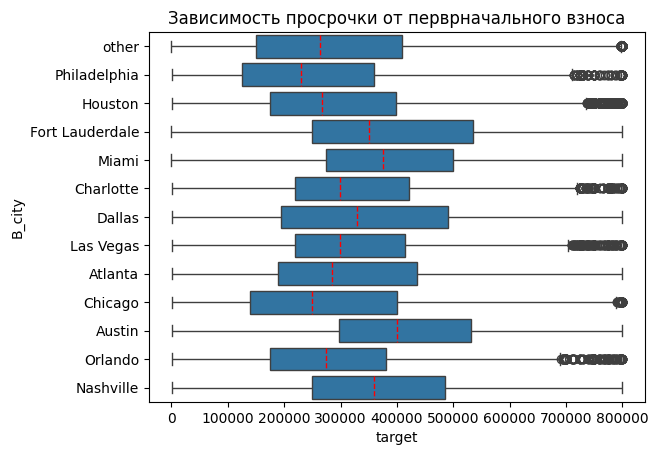

In [65]:
ax = sns.boxplot(df, x='target', y='B_city', orient='h', medianprops={"color": "red", "linestyle": '--'})
ax.set(xlabel='target', ylabel='B_city')
plt.title('Зависимость просрочки от перврначального взноса' )
plt.show()

In [66]:
df.drop('city', axis= 1 , inplace= True )

In [67]:
df=df.drop_duplicates ()

In [68]:
df['zipcode'] = df['zipcode'].str.replace('-', ' ')
df['zipcode']= df['zipcode'].str.rstrip().str.split( ).str[0]
df['zipcode'] = df['zipcode'].replace('', np.nan).bfill()
df['zipcode'] = pd.to_numeric(df['zipcode'], errors='coerce')
df['zipcode'] = df['zipcode']. fillna(df['zipcode'].mode())
df['zipcode'].astype(int)

<ipython-input-68-af3eb10ff269>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['zipcode'] = df['zipcode'].str.replace('-', ' ')


0         28387
1         99216
4         32908
5         19145
6         34759
          ...  
377179    20001
377181    60657
377182    11434
377183    77028
377184    78218
Name: zipcode, Length: 314344, dtype: int64

In [69]:
df=df.drop_duplicates ()

In [70]:
df['Price/sqft']=df['Price/sqft'].astype(str).str.replace(r"[^\d\.]", "", regex=True)
df['Price/sqft']=df['Price/sqft'].replace('', np.nan).bfill()

In [71]:
df['Price/sqft']=df['Price/sqft'].fillna(df['Price/sqft'].median())
df['Price/sqft'].astype(int)

0         14
1         15
4         23
5         23
6          6
          ..
377179    56
377181    33
377182    45
377183    14
377184    14
Name: Price/sqft, Length: 314344, dtype: int64

In [72]:
#df_num = df_dummies.select_dtypes(include=['float64', 'int64'])

In [73]:
#df_num.corr()

In [74]:
df.drop(['Year built','lotsize','Sqft','beds_n','Price/sqft','Remodeled_year'], axis= 1 , inplace= True )

In [75]:
df_dummies = pd.get_dummies(df, columns=['propertyType','Heating','Status','B_city'])

In [76]:
#df_dummies.corr()

In [77]:
#categorical_columns=df[['propertyType','state','Heating','Status','B_city']]
#categorical_columns

In [78]:
#def get_stat_dif(column):
#    """
 #   Функция проверяет значимость с помощью теста Стьюдента,
 #   Если признак значимо влияет на score, записывает название столбца в model_columns
 #   """
 #   cols = df[column].value_counts().index
#   combinations_all = list(combinations(cols, 2))
#   for comb in combinations_all:
  #      if ttest_ind(df[df['target'] > 0].loc[df[column] == comb[0], 'target'],
 #                    df[df['target'] > 0].loc[df[column] == comb[1], 'target']).pvalue \
 #                   <= 0.05/len(combinations_all):  # Учли поправку Бонферони
#                print('Найдены статистически значимые различия для колонки', column)
#                model_columns.append(column)
#                break

In [79]:
#model_columns = []  # здесь будем хранить статистически значимые категориальные признаки
#for col in categorical_columns:
#    get_stat_dif(col)

In [80]:
df_new=df_dummies[['target','schools_distance_ave','baths_n','zipcode','B_city_Miami','propertyType_other','B_city_Austin','Status_for sale construction',
'B_city_Fort Lauderdale','Heating_electric','Status_for sale','B_city_Nashville','Status_foreclosure','school_count','propertyType_other']]

In [81]:
#df_new.corr()

**Models **

In [82]:
X = df_new.drop(['target'], axis = 1)
y = df_new['target']

In [83]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train.shape , X_test.shape, y_train.shape, y_test.shape

((235758, 14), (78586, 14), (235758,), (78586,))

In [84]:
!pip install optuna

In [86]:
import optuna

In [87]:
def optuna_rf(trial):
  # задаем пространства поиска гиперпараметров
  n_estimators = trial.suggest_int('n_estimators', 100, 300, 10)
  max_depth = trial.suggest_int('max_depth', 15, 40, 1)
  min_samples_leaf = trial.suggest_int('min_samples_leaf', 3, 7, 1)

  # создаем модель
  model = ensemble.RandomForestClassifier(n_estimators=n_estimators,
                                          max_depth=max_depth,
                                          min_samples_leaf=min_samples_leaf,
                                          random_state =42)
  # обучаем модель
  model.fit(X_train, y_train)
  score = metrics.f1_score(y_train, model.predict(X_train))

  return score

In [1]:
%%time
# cоздаем объект исследования
# можем напрямую указать, что нам необходимо максимизировать метрику direction="maximize"
study = optuna.create_study(study_name="RandomForestClassifier", direction="maximize")
# ищем лучшую комбинацию гиперпараметров n_trials раз
study.optimize(optuna_rf, n_trials=20)

NameError: name 'optuna' is not defined

In [ ]:
# выводим результаты на обучающей выборке
print("Наилучшие значения гиперпараметров {}".format(study.best_params))
print("f1_score на обучающем наборе: {:.2f}".format(study.best_value))

In [ ]:
from sklearn import tree #деревья решений
from sklearn import ensemble #ансамбли
from sklearn import metrics #метрики
from sklearn import preprocessing #предобработка
from sklearn.model_selection import train_test_split #сплитование выборки

%matplotlib inline

In [ ]:
# рассчитаем точность для тестовой выборки
model = ensemble.RandomForestClassifier(**study.best_params,random_state=random_state, )
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
print("accuracy на тестовом наборе: {:.2f}".format(model.score(X_test, y_test)))
y_test_pred = model.predict(X_test)
print('f1_score на тестовом наборе: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))

In [ ]:
# рассчитаем точность для тестовой выборки
model = ensemble.RandomForestClassifier(
    random_state=42)
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
#print(metrics.classification_report(y, y_pred))

In [ ]:
%%time
# можем прододжить подбор, указав n_trials(любое число, которое добавится к предыдущим итерациям)
study.optimize(optuna_rf, n_trials=10)

In [ ]:
gboost,